# Ising class get time of decoherence

In [2]:
import numpy as np
import scipy
import scipy.signal as signal
import scipy.constants
from scipy.fft import fft2, fftshift
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

%matplotlib notebook
%matplotlib inline
from IPython.display import HTML
import ipywidgets as widgets

from Ising_class import IsingModel
from utils import *




def autocorrelation(signal):
    """
    Calculate the autocorrelation of a 1D signal using numpy.
    """
    n = len(signal)
    signal = signal - np.mean(signal)  # Center the signal
    result = np.correlate(signal, signal, mode='full')
    result = result[n-1:] / np.arange(n, 0, -1)  # Normalize
    return result / result[0]  # Normalize to 1 at lag 0

# Different temperatures

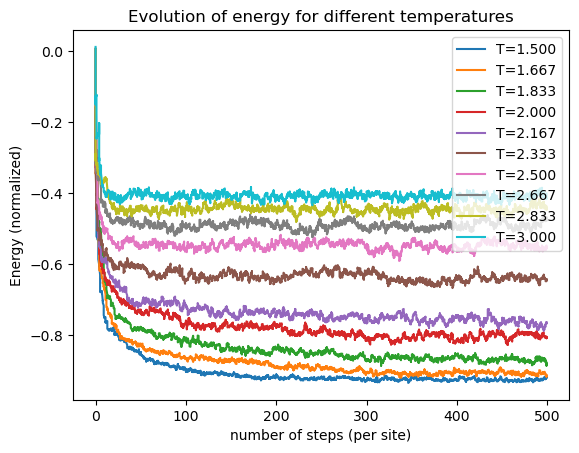

In [6]:

n_tries = 1
T_list = np.linspace(1.5, 3, 10)

for T in T_list:
    for _ in range(n_tries):
        model = IsingModel(N=100, T=T)
        model.simulate(2000, save_data=True)
        plt.plot(np.arange(len(model.E_frames))//4, model.E_frames, label='T={:.3f}'.format(T))

plt.title('Evolution of energy for different temperatures')
plt.xlabel('number of steps (per site)')
plt.ylabel('Energy (normalized)')
plt.legend()

# At T=Tc

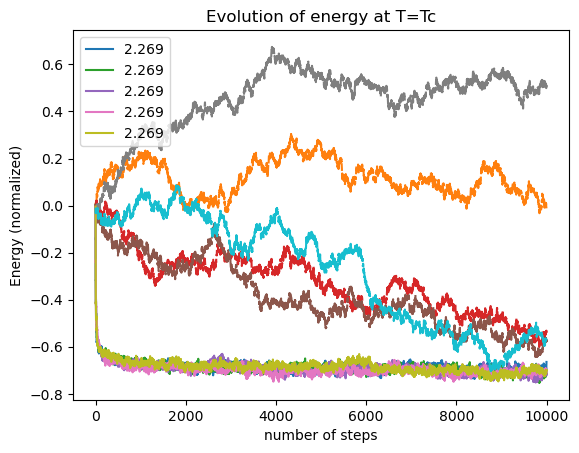

In [8]:

n_tries = 5
T_list = [Tc]

for T in T_list:
    for _ in range(n_tries):
        model = IsingModel(N=100, T=T)
        model.simulate(10000, save_data=True)
        plt.plot(model.E_frames)#, label='{:.3f}'.format(T))
        plt.plot(model.M_frames, ls='--')#, label='{:.3f}'.format(T))
plt.title('Evolution of energy at T=Tc')
plt.xlabel('number of steps')
plt.ylabel('Energy (normalized)')
plt.legend()

# Autocorrelation graph

In [20]:
n_signals = 10
n_samples = 1000

T_list = [1.5, 1.7, 1.9, 2.1, 2.2, 2.269, 2.3, 2.4, 2.6, 2.8, 3]

data_E = np.zeros((len(T_list), n_signals, n_samples))
data_M = np.zeros((len(T_list), n_signals, n_samples))

for i, T in enumerate(T_list):
    for n in range(n_signals):
        model = IsingModel(N=100, T=T)
        
        #equilibration
        model.simulate(5000)

        #sample the energy and magnetization data
        model.simulate(n_samples, save_data=True)
        data_E[i, n] = model.E_frames
        data_M[i, n] = model.M_frames


np.save('data_vectorize_for_autocorrelation_E_final.npy', data_E)
np.save('data_vectorize_for_autocorrelation_M_final.npy', data_M)

In [65]:
#T_list = [1.5, 1.7, 1.9, 2.1, 2.2, 2.269, 2.3, 2.4, 2.6, 2.8, 3]


data_E = np.load('data_vectorize_for_autocorrelation_E_final.npy')
data_M = np.load('data_vectorize_for_autocorrelation_M_final.npy')

n_signals = data_E.shape[1]
n_samples = data_E.shape[2]
data_E.shape

(11, 10, 1000)

In [66]:
mean_cor_vec = np.zeros((len(T_list), n_samples))

for i, T in enumerate(T_list):
    cor_list = []
    for n in range(data_E.shape[1]):
        signal = data_E[i, n]
        cor_list.append(autocorrelation(signal))

    mean_cor_vec[i] = np.mean(np.array(cor_list), axis=0)

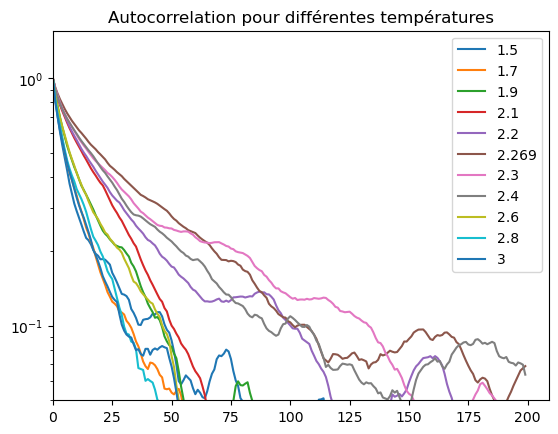

In [67]:
for i, T in enumerate(T_list):
    plt.semilogy(mean_cor_vec[i][:200], label='{}'.format(T))
    plt.xlim(0)
    plt.ylim(0.05)
    plt.legend()
    plt.title('Autocorrelation pour différentes températures')

In [68]:
tau_list = []
for i, T in enumerate(T_list):
    x = np.arange(5)
    y = np.log10(mean_cor_vec[i][:5])
    tau_list.append(- 1/ np.polyfit(x, y, 1)[0])

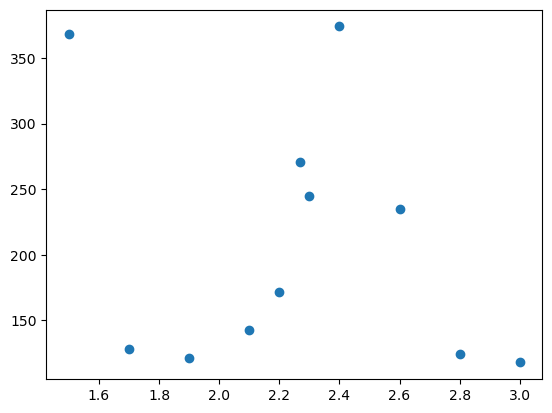

In [64]:
plt.scatter(T_list, np.array(tau_list))


M_tau_list = tau_list

Text(0.5, 0, 'Temperature')

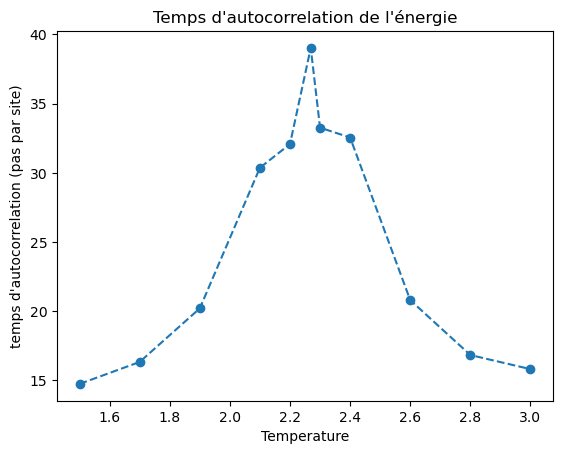

In [75]:
plt.plot(T_list, np.array(tau_list), ls='--', )
plt.scatter(T_list, np.array(tau_list))

E_tau_list = tau_list

plt.title("Temps d'autocorrelation de l'énergie")
plt.ylabel("temps d'autocorrelation (pas par site)")
plt.xlabel("Temperature")

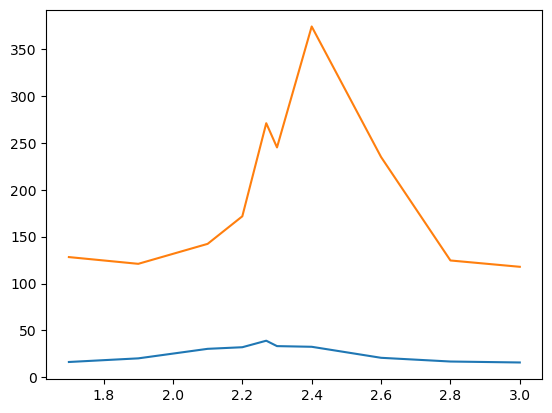

In [71]:
plt.plot(T_list[1:], E_tau_list[1:])
plt.plot(T_list[1:], M_tau_list[1:])

# test simple metropolis

In [35]:
n_signals = 1
n_samples = 400*350

T_list = [2.2]#[1.5, 2.1, 2.269, 2.4, 3] #np.linspace(1.5, 3, 10)

data_E_simple = np.zeros((len(T_list), n_signals, n_samples))
data_M_simple = np.zeros((len(T_list), n_signals, n_samples))

for i, T in enumerate(T_list):
    for n in range(n_signals):
        model = IsingModel(N=20, T=T)
        model.sublattice_size = model.N
        
        #equilibration
        model.simulate(20000)

        #sample the energy and magnetization data
        model.simulate(n_samples, save_data=True)
        data_E_simple[i, n] = model.E_frames
        data_M_simple[i, n] = model.M_frames

KeyboardInterrupt: 

In [4]:
mean_cor_vec = np.zeros((len(T_list), n_samples))

for i, T in enumerate(T_list):
    cor_list = []
    for n in range(n_signals):
        signal = data_E_simple[i, n]
        cor_list.append(autocorrelation(signal))

    mean_cor_vec[i] = np.mean(np.array(cor_list), axis=0)

/tmp/ipykernel_3616/2630576975.py:30: RuntimeWarning: invalid value encountered in divide
  return result / result[0]  # Normalize to 1 at lag 0


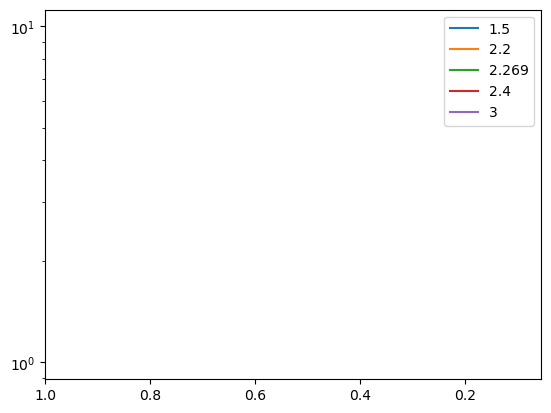

In [5]:
for i, T in enumerate(T_list):
    plt.semilogy(mean_cor_vec[i][:50], label='{}'.format(T))
    plt.xlim(1)
    plt.legend()